In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
from sklearn.metrics import roc_curve
import seaborn as sns
import os

TF_list = ["CTCF",
"EBF1",
"SP1",
"PU1",
"RUNX3",
"NFYB",
"Nrf1",
"ELF1",
"NFKB",
"TCF3",
"Mxi1",
"USF1",
"YY1",
"USF2",
"ZEB1",
"PAX5",
"POU2F2",
"NRSF",
"PBX3",
"MEF2A",
"E2F4",
"BHLHE40",
"ELK1",
"NFIC",
"MEF2C",
"Max",
"SRF",
"Znf143",
"IRF4",
"ZBTB33",
"NFYA",
"ETS1",
"RFX5",
"STAT3",
"JunD",
"CEBPB",
"STAT1",
"FOS"]


Populating the interactive namespace from numpy and matplotlib


# Figure 2A: Simulation signal to noise

In [2]:
# GCAM data
gcfile_exp = "/storage/pandaman/project/AgentBind-Simulation/results/gcam/c/simulated-TAL1/sn_ratio_list.txt"
gcam_sn_exp = [float(item) for item in open(gcfile_exp, "r").readlines()]
gcfile_ctrl = "/storage/pandaman/project/AgentBind-Simulation/results/gcam/c/simulated-TAL1/sn_ratio_control_list.txt"
gcam_sn_ctrl = [float(item) for item in open(gcfile_ctrl, "r").readlines()]

# SMAP
smfile_exp = "/storage/pandaman/project/AgentBind-Simulation/results/reg/c/simulated-TAL1/sn_ratio_list.txt"
sm_sn_exp = [float(item) for item in open(smfile_exp, "r").readlines()]
smfile_ctrl = "/storage/pandaman/project/AgentBind-Simulation/results/reg/c/simulated-TAL1/sn_ratio_control_list.txt"
sm_sn_ctrl = [float(item) for item in open(smfile_ctrl, "r").readlines()]

# MUT
mutfile_exp = "/storage/pandaman/project/AgentBind-Simulation/results/prtb/c/simulated-TAL1/sn_ratio_list.txt"
mut_sn_exp = [float(item) for item in open(mutfile_exp, "r").readlines()]
mutfile_ctrl = "/storage/pandaman/project/AgentBind-Simulation/results/prtb/c/simulated-TAL1/sn_ratio_control_list.txt"
mut_sn_ctrl = [float(item) for item in open(mutfile_ctrl, "r").readlines()]

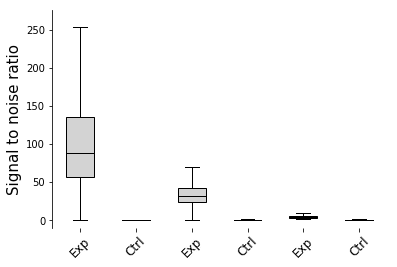

In [3]:
sndata = [gcam_sn_exp, gcam_sn_ctrl, sm_sn_exp, sm_sn_ctrl, mut_sn_exp, mut_sn_ctrl]
xticklabels = ["Exp","Ctrl"]*3
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(sndata, sym="", patch_artist=True, medianprops={"color": "black"});

# fill with colors
colors = ["lightgray"]*6 #["darkgreen","darkgreen","darkblue","darkblue","purple","purple"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
ax.patch.set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim(bottom=-10, top=275)
ax.set_ylabel("Signal to noise ratio", size=15);
ax.set_xticklabels(xticklabels, size=12, rotation=45);

# Figure 2B: Example simulation

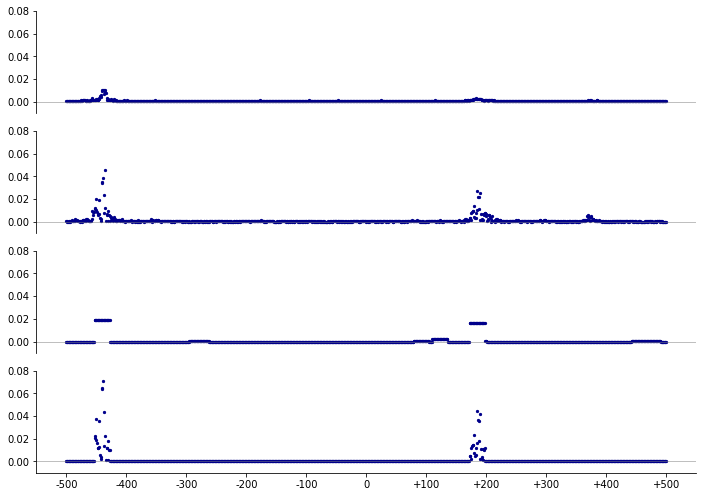

In [4]:
exnum = 718
gcfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/gcam/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
gcam = [abs(float(item.strip().split()[1])) for item in open(gcfile_ex, "r").readlines()]

smfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/reg/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
sm = [abs(float(item.strip().split()[1])) for item in open(smfile_ex, "r").readlines()]

mutfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/prtb/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
mut = [abs(float(item.strip().split()[1])) for item in open(mutfile_ex, "r").readlines()]

camfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/cam/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
cam = [abs(float(item.strip().split()[1])) for item in open(camfile_ex, "r").readlines()]

sval = 1
color = "darkblue"

xvals = range(len(gcam))
fig = plt.figure()
fig.set_size_inches((10,7))

ax = fig.add_subplot(411)
ax.scatter(xvals, mut, color=color, s=5.0)
#ax.set_yticks(np.arange(0, 0.021, 0.01))
ax.set_xticks([])
ax.axhline(y=0, color="gray", linewidth=0.5)
ax.set_ylim(bottom=-0.01, top=0.08)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(412)
ax.scatter(xvals, sm, color=color, s=5.0)
ax.set_xticks([])
ax.axhline(y=0, color="gray", linewidth=0.5)
#ax.set_yticks(np.arange(-0.05, 0.06, 0.05))
ax.set_ylim(bottom=-0.01, top=0.08)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(413)
ax.scatter(xvals, cam, color=color, s=5.0)
#ax.set_yticks(np.arange(0, 0.021, 0.01))
ax.set_xticks([])
ax.axhline(y=0, color="gray", linewidth=0.5)
ax.set_ylim(bottom=-0.01, top=0.08)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(414)
ax.scatter(xvals, gcam, color=color, s=5.0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])
#ax.set_yticks(np.arange(-0.05, 0.11, 0.05))
ax.axhline(y=0, color="gray", linewidth=0.5)
ax.set_ylim(bottom=-0.01, top=0.08)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fig.tight_layout()

# Figure 2C: Example context score locus

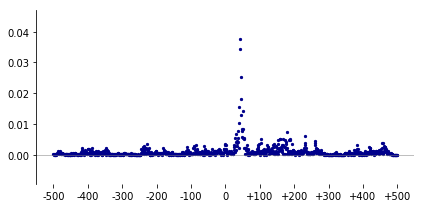

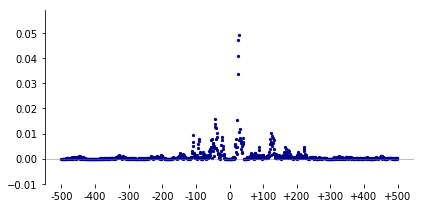

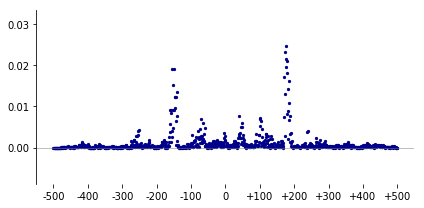

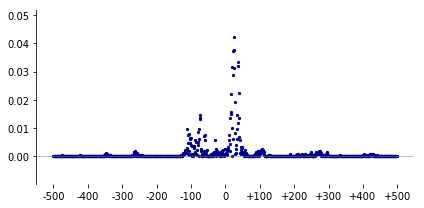

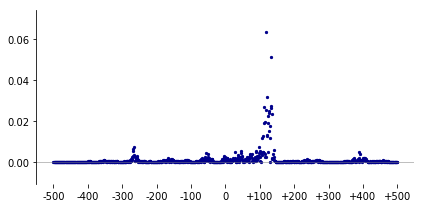

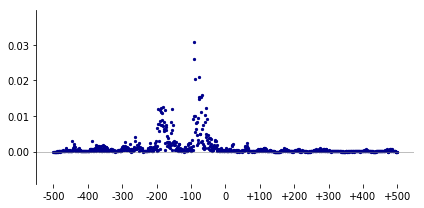

In [5]:
def output_bedgraph(weightfile, outfile):
    header = open(weightfile, "r").readlines()[0].strip().split(";")
    chrom = header[0]
    start = int(header[3])
    outf = open(outfile, "w")
    with open(weightfile, "r") as f:
        for line in f:
            if "chr" in line: continue
            val = line.strip().split()[-1]
            outf.write("\t".join([chrom, str(start), str(start+1), str((float(val)))])+"\n")
            start += 1
    outf.close()
    
def draw_sample(TF, exnum):
    ex_danq_f = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/%s+GM12878/weight_figures/vis-sample-%s.txt"%(TF, exnum)
    ex_ds_f = "/storage/pandaman/project/AgentBind-GM12878-DeepSEA-unfixed/storage/AgentBind-GM12878-DeepSEA/results/c/%s+GM12878/weight_figures/vis-sample-%s.txt"%(TF, exnum)
    outfile = "%s_%s.bedgraph"%(TF, exnum)
    danq = [abs(float(item.strip().split()[1])) for item in open(ex_danq_f, "r").readlines()[1:]]
    ds = [abs(float(item.strip().split()[1])) for item in open(ex_ds_f, "r").readlines()[1:]]

    sval = 1
    color = "darkblue"

    xvals = range(len(danq))

    fig = plt.figure()
    fig.set_size_inches((6,3))
    ax = fig.add_subplot(111)
    ax.scatter(xvals, [(item) for item in danq],  color=color, s=5.0);
    ax.set_xticks(np.arange(0, 1001, 100))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axhline(y=0, color="gray", linewidth=0.5)
    ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])
    fig.tight_layout()
    output_bedgraph(ex_danq_f, outfile)
    
draw_sample("SP1", 86) # favorite. NFY motif obvious
draw_sample("SP1", 79)
draw_sample("SP1", 88)
draw_sample("EBF1", 144)
draw_sample("ELF1", 169)
draw_sample("NFYB", 11)

# Figure 2D: Aggregate context scores

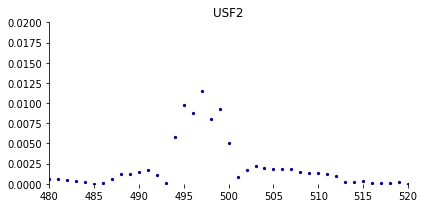

In [14]:
def draw_sample_ttl(TF):
    ex_danq_f = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/%s+GM12878/weight_figures/vis-sample-total.txt"%(TF)
    ex_ds_f = "/storage/pandaman/project/AgentBind-GM12878-DeepSEA-unfixed/storage/AgentBind-GM12878-DeepSEA/results/c/%s+GM12878/weight_figures/vis-sample-total.txt"%(TF)
    danq = [abs(float(item.strip().split()[1])) for item in open(ex_danq_f, "r").readlines()[1:]]
    ds = [abs(float(item.strip().split()[1])) for item in open(ex_ds_f, "r").readlines()[1:]]

    sval = 1
    color = "darkblue"

    xvals = range(len(danq))
    
    # Set middle region to 0
    #for i in range(480, 521): danq[i] = 0
    
    fig = plt.figure()
    fig.set_size_inches((6,3))
    ax = fig.add_subplot(111)
    ax.scatter(xvals, [(item) for item in danq],  color=color, s=5.0);
    #ax.set_xticks(np.arange(0, 1001, 100))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim(bottom=min(danq), top=0.02)
    ax.axhline(y=0, color="gray", linewidth=0.5)
    #ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])
    ax.set_xlim(left=480, right=520)
    plt.title(TF)
    fig.tight_layout()

#for TF in TF_list:
#    draw_sample_ttl(TF)
draw_sample_ttl("USF2")

In [12]:
# Output all examples to bedgraph and bed
for tf in TF_list: # STAT1","JunD","NFYB","ELF1","SP1"]:
    outf_bg = open("%s.bedgraph"%tf, "w")
    outf_bed = open("%s.bed"%tf, "w")
    pdir = "/storage/pandaman/project/AgentBind-GM12878-DeepSEA-unfixed/storage/AgentBind-GM12878-DeepSEA/results/c/%s+GM12878/weight_figures/"%tf
    pfiles = os.listdir(pdir)
    for pf in pfiles:
        if "total" in pf: continue
        if ".png" in pf: continue
        pfname = os.path.join(pdir, pf)
        header = open(pfname, "r").readlines()[0].strip().split(";")
        chrom = header[0]
        start = int(header[3])
        motif_start = int(header[1])
        motif_end = int(header[2])
        with open(pfname, "r") as f:
            for line in f:
                if "chr" in line: continue
                val = line.strip().split()[-1]
                outf_bg.write("\t".join([chrom, str(start), str(start+1), str((float(val)))])+"\n")
                start += 1
        outf_bed.write("\t".join([chrom, str(motif_start), str(motif_end)])+"\n")
    outf_bg.close()
    outf_bed.close()